Test quantile comparison method for historical versus future

# James seems to be using this function with the default method
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html
 hist_ann_quantile = percentileofscore([h[0] for h in hist_ref_ann.values], refv.iloc[0])
 plotting using ecdf matplotlib function (empirical cummulative distribution function)
 ax[r,c].ecdf(loca2_pcp_ref_sel.loc[bl_midx,f'{wbaID}'], c='0.7', 
                     label='LOCA2 Ref', orientation='horizontal')

In [2]:
import numpy as np
import pandas as pd
from pathlib import Path

import os, sys
import glob

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as tkr
#import seaborn as sns
#sns.set_style('ticks')

from scipy import stats
from scipy.stats import percentileofscore


In [3]:
#now try with some real data

In [9]:
hist=pd.read_csv("/global/scratch/users/jennaisrael/time_varying_data/cleaned_aws/NE_corner_HRRR_a_l_l_1990_1999")
proj=pd.read_csv("/global/scratch/users/jennaisrael/time_varying_data/cleaned_aws/NE_corner_HRRR_a_l_l_2028_2057")
hist

,Unnamed: 0,datetime,month,LWDOWN_W/m2,prec_mm/day,PSFC_Pa,Q2_kg/kg,SWDOWN_W/m2,T2_celsius,tmax_celsius,tmin_celsius,U10_m/s,V10_m/s
0,0,1990-10-01,10,346.789673,0.0,97569.055664,0.006808,207.814285,24.941437,32.972900,15.969147,-0.565510,0.510594
1,1,1990-10-02,10,329.681396,0.0,97531.492188,0.006504,207.310211,21.953896,30.035278,12.627258,-0.067621,-0.698672
2,2,1990-10-03,10,333.074768,0.0,97542.032227,0.005525,209.801285,22.797951,33.355103,13.906128,-0.226782,-0.453080
3,3,1990-10-04,10,351.062134,0.0,97573.552734,0.006168,194.791321,25.275585,32.553345,17.427399,-0.588008,1.165665
4,4,1990-10-05,10,327.395966,0.0,97517.330078,0.006229,194.495544,20.829510,29.569885,11.856567,-0.438163,0.686803
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3658,3658,2000-09-27,9,317.453491,0.0,97519.107422,0.006260,218.607895,20.973751,29.702667,11.824493,-0.473174,1.269252
3659,3659,2000-09-28,9,301.671875,0.0,97480.053711,0.006811,221.076721,17.941082,26.116516,8.957886,-0.090213,0.349259
3660,3660,2000-09-29,9,310.980896,0.0,97510.452148,0.006409,226.286362,20.361168,33.347290,10.564972,0.334680,-0.643931
3661,3661,2000-09-30,9,340.393982,0.0,97574.537109,0.005803,214.686264,25.384865,34.499725,16.618561,-0.253583,-0.374134


In [6]:
hist[hist.month == 10]

,Unnamed: 0,datetime,month,LWDOWN_W/m2,prec_mm/day,PSFC_Pa,Q2_kg/kg,SWDOWN_W/m2,T2_celsius,tmax_celsius,tmin_celsius,U10_m/s,V10_m/s
0,0,1990-10-01,10,250.567276,0.0,101325.0,0.006,205.819427,4.997688,9.882172,0.004883,0.539,0.131
1,1,1990-10-02,10,250.636414,0.0,101325.0,0.006,203.772400,4.999584,9.880310,0.005676,0.539,0.131
2,2,1990-10-03,10,250.693665,0.0,101325.0,0.006,201.415680,4.997974,9.880402,0.007446,0.539,0.131
3,3,1990-10-04,10,250.768082,0.0,101325.0,0.006,199.375702,5.000790,9.877960,0.007935,0.539,0.131
4,4,1990-10-05,10,250.825470,0.0,101325.0,0.006,197.026459,4.998638,9.878052,0.009949,0.539,0.131
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10647,10647,2019-10-27,10,252.479340,0.0,101325.0,0.006,151.610046,5.003876,9.853485,0.054565,0.539,0.131
10648,10648,2019-10-28,10,252.565735,0.0,101325.0,0.006,149.730896,5.005569,9.851166,0.056915,0.539,0.131
10649,10649,2019-10-29,10,252.644318,0.0,101325.0,0.006,147.891586,5.005184,9.849609,0.058014,0.539,0.131
10650,10650,2019-10-30,10,252.723221,0.0,101325.0,0.006,146.062256,5.004772,9.848785,0.060394,0.539,0.131


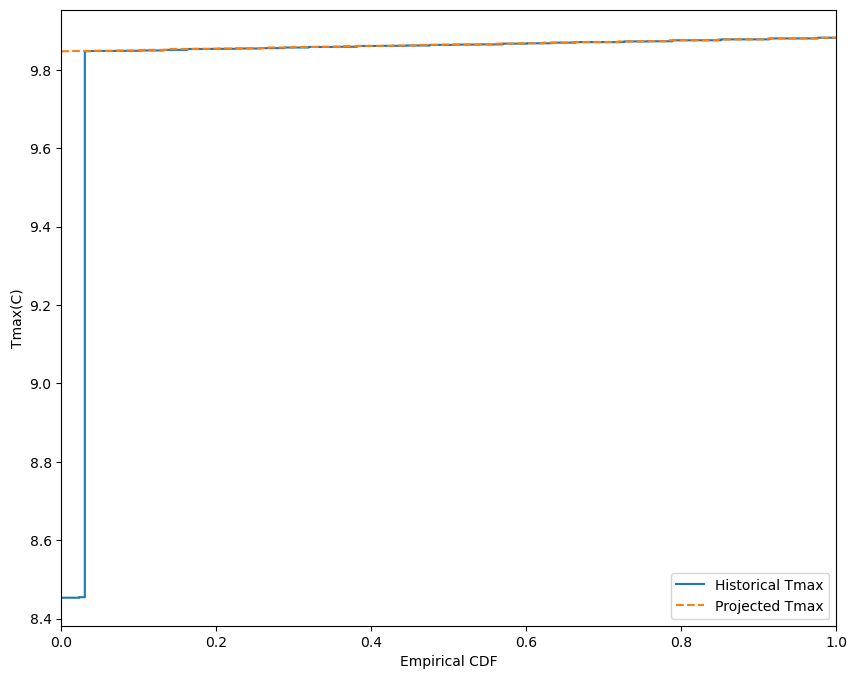

In [15]:
#try just doing october for tmax_celcsius, get the percentile of each entry for each month
oct_hist=hist[hist.month == 10].tmax_celsius
oct_proj=proj[proj.month == 10].tmax_celsius

# quantiles_hist=np.zeros_like(oct_hist)
# quantiles_proj=np.zeros_like(oct_proj)

fig, ax = plt.subplots(1,figsize=(10,8))

# #ecdf does this automatically! Don't need to calculate the percentiles first
# quantiles_hist=percentileofscore([k for k in oct_hist],oct_hist)
# quantiles_proj=percentileofscore([j for j in oct_proj],oct_proj)

ax.ecdf(oct_hist,label="Historical Tmax",orientation='horizontal')
ax.ecdf(oct_proj,label="Projected Tmax",orientation='horizontal',ls="--")
ax.set_ylabel('Tmax(C)')

ax.set_xlabel('Empirical CDF')
plt.legend()
plt.show()

In [20]:
list(hist.columns)

['Unnamed: 0',
 'datetime',
 'month',
 'LWDOWN_W/m2',
 'prec_mm/day',
 'PSFC_Pa',
 'Q2_kg/kg',
 'SWDOWN_W/m2',
 'T2_celsius',
 'tmax_celsius',
 'tmin_celsius',
 'U10_m/s',
 'V10_m/s']

['LWDOWN_W/m2', 'prec_mm/day', 'PSFC_Pa', 'Q2_kg/kg', 'SWDOWN_W/m2', 'T2_celsius', 'tmax_celsius', 'tmin_celsius', 'U10_m/s', 'V10_m/s']


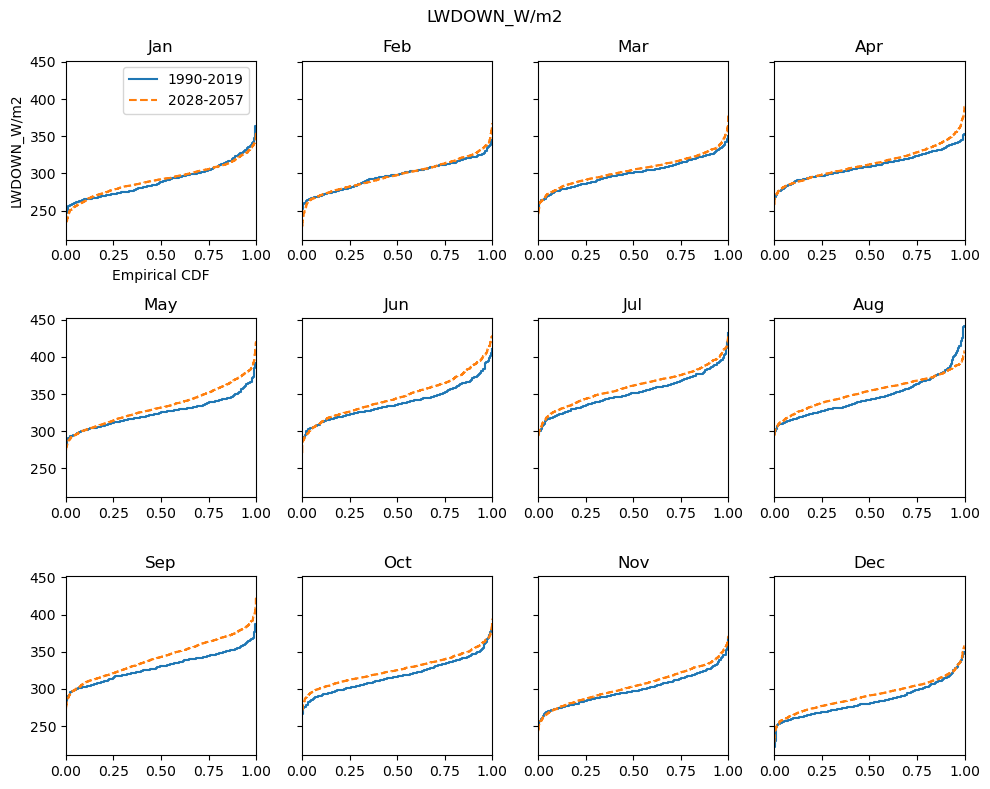

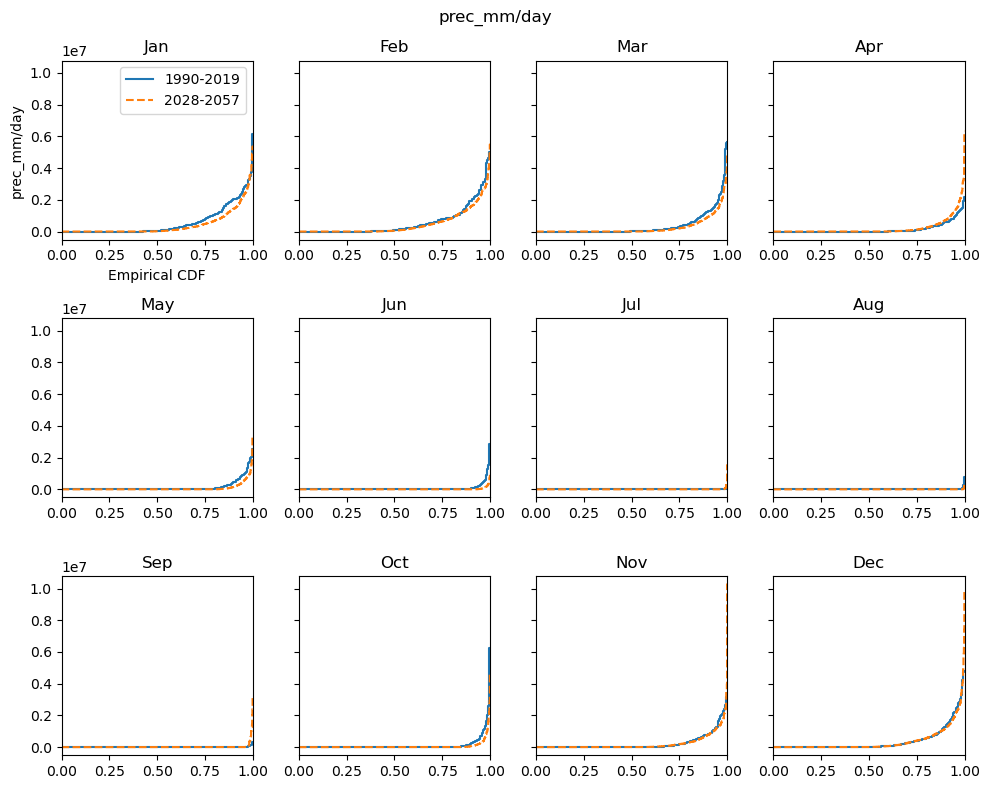

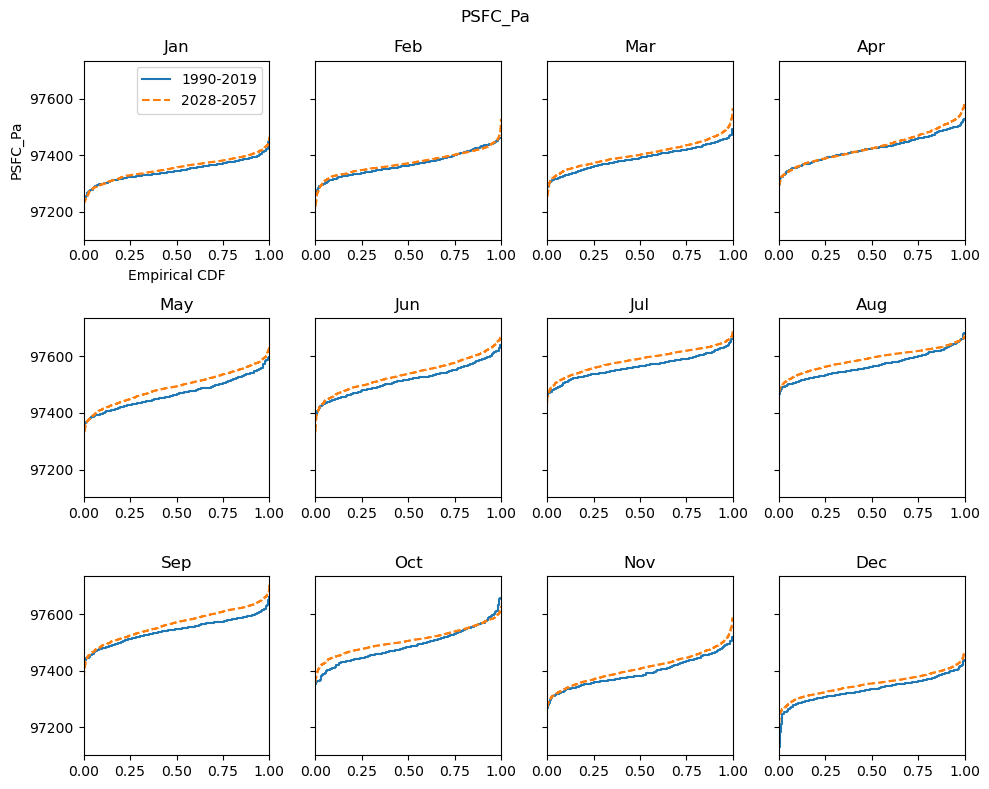

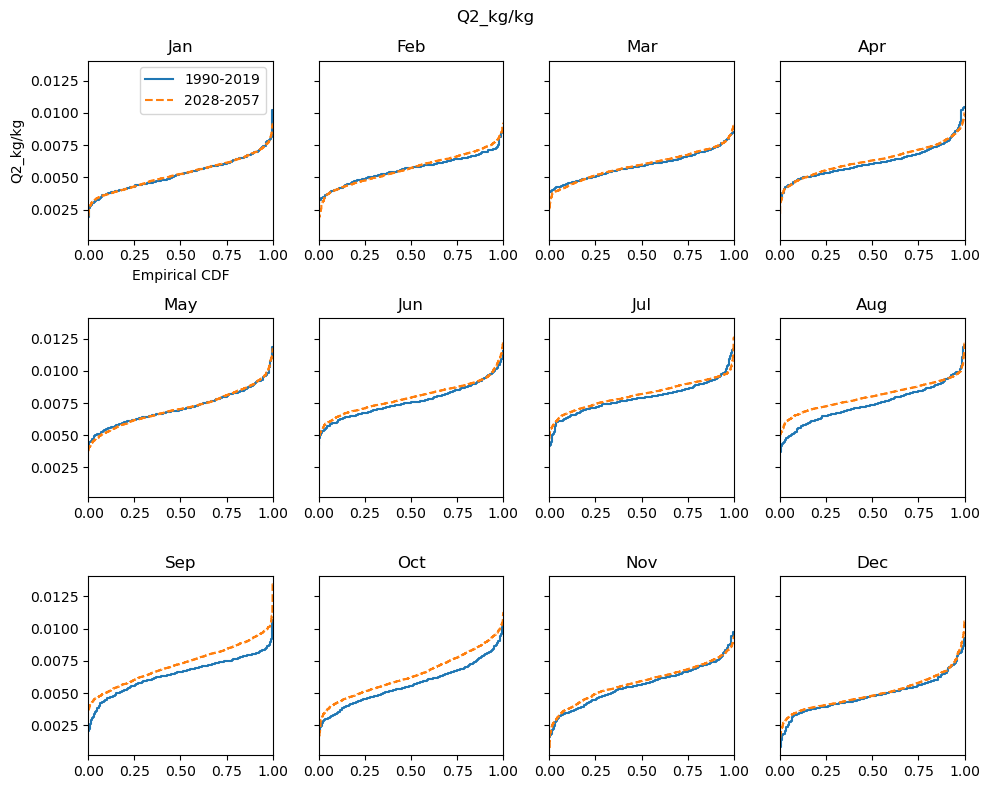

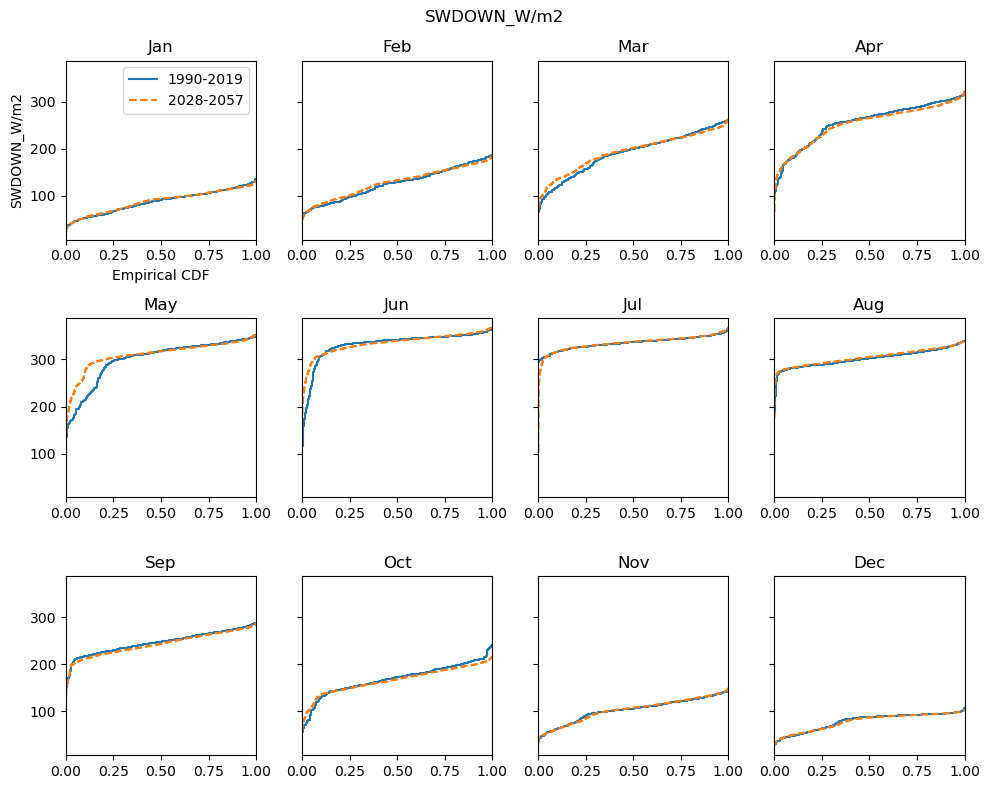

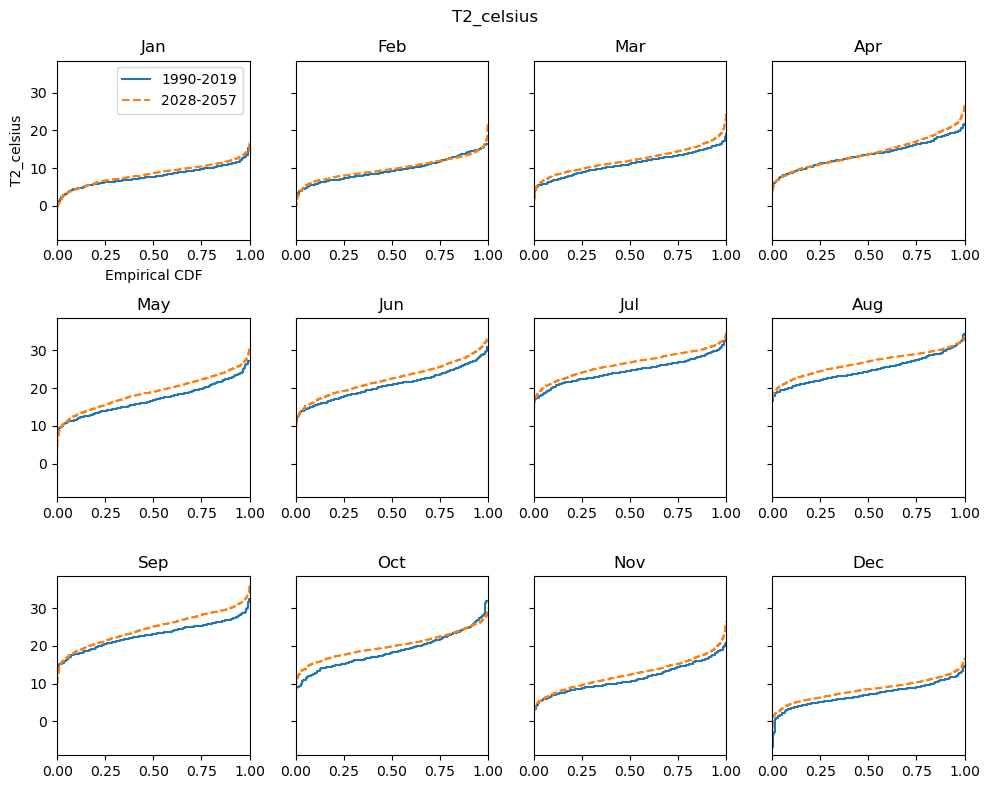

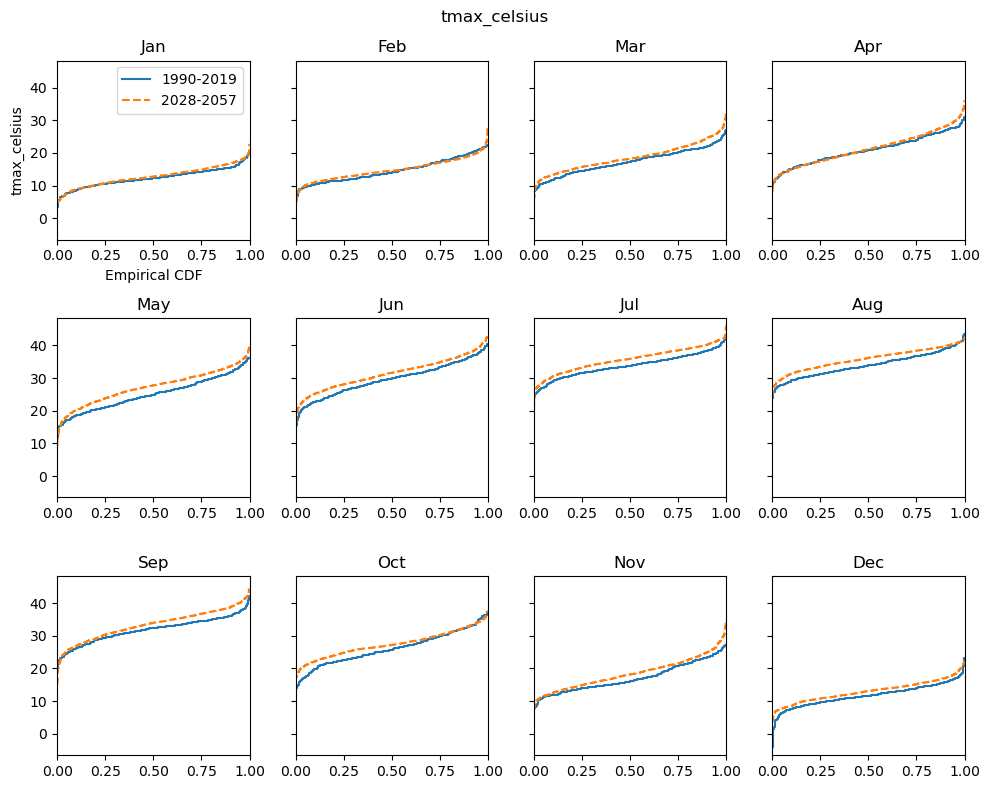

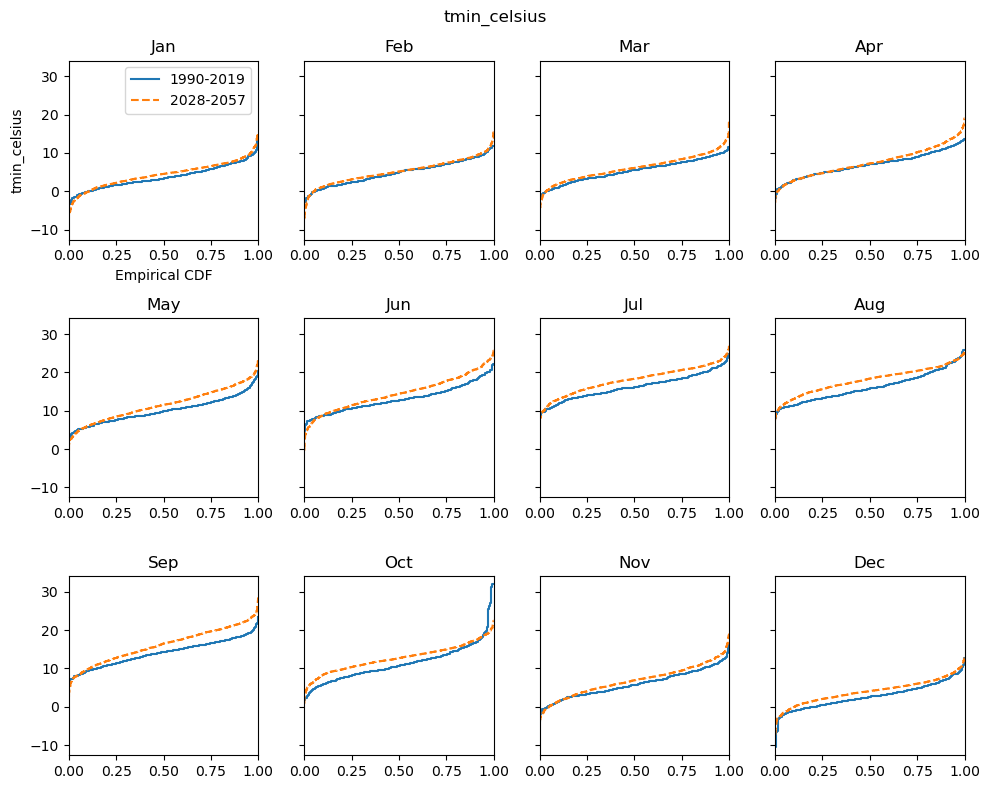

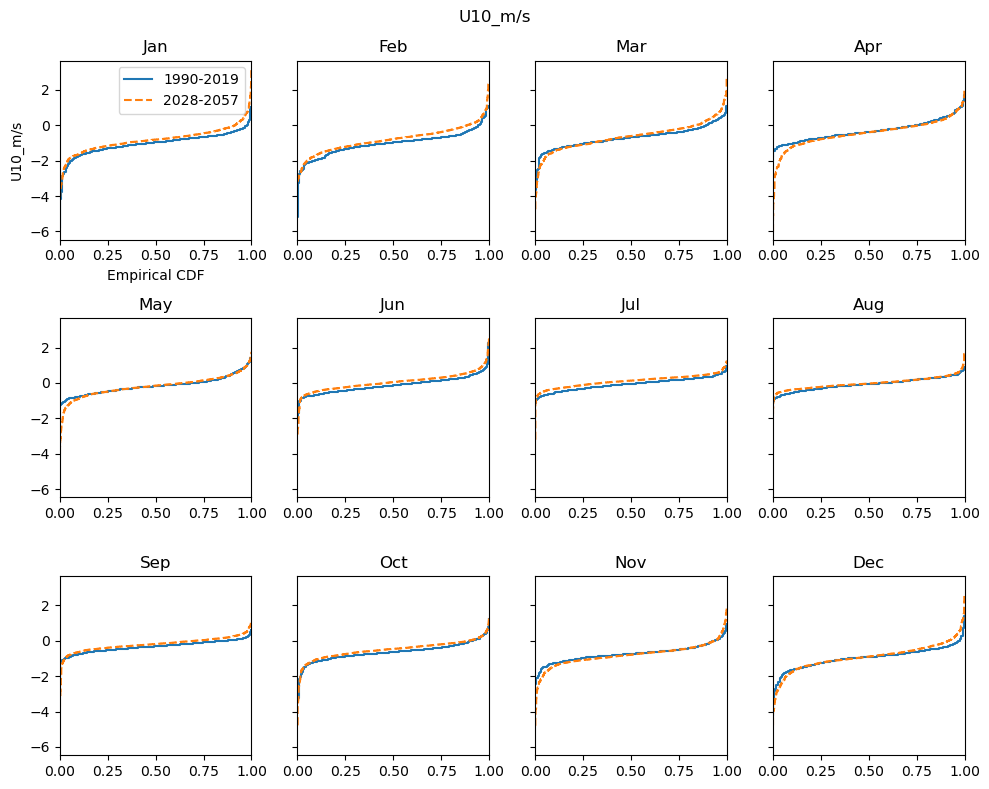

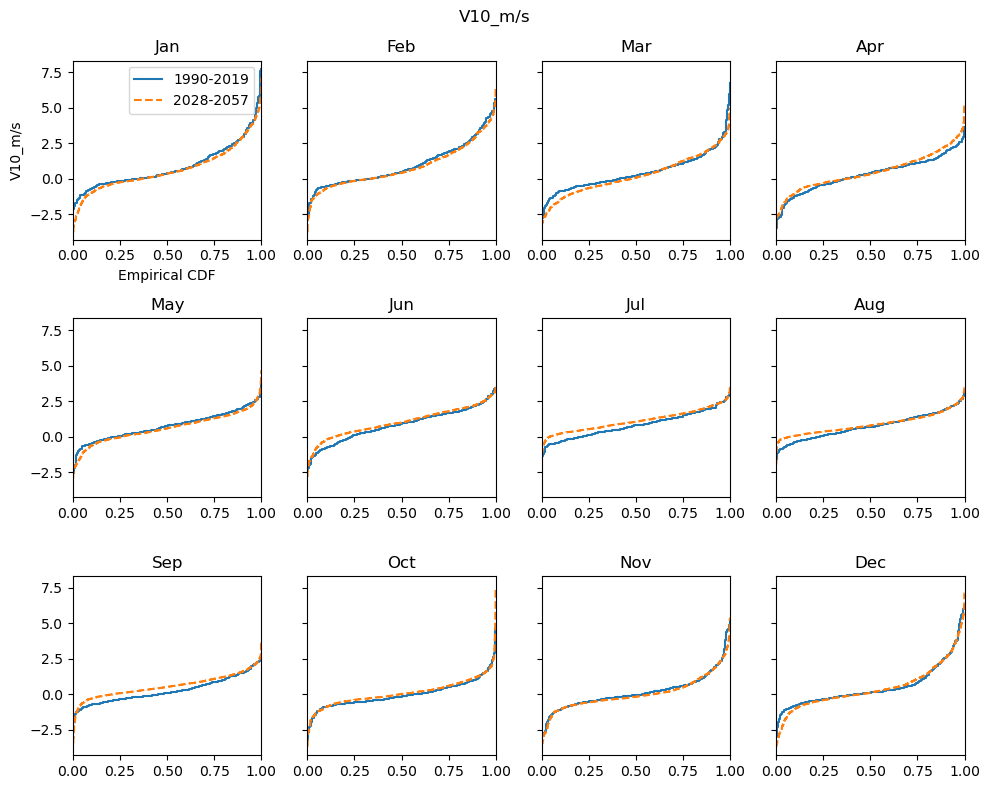

In [10]:
#in a loop for each month for each variable
#first get the keys for the column heads
vars=list(hist.columns)[3:] #drop the first 3 columns which are not variables
print(vars)
monthlist=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
flag=0
subs='_'
for v in vars:
    fig, ax = plt.subplots(3,4,figsize=(10,8),sharey=True)
    fig.suptitle(v)
    varname= v.split(subs)[0]
    for m in np.arange(1,13):
        vm_hist=hist[hist.month == m][v]
        vm_proj=proj[proj.month == m][v]
        r = (m-1)//4
        c = (m-1)%4
        
        if m==1 :
            flag=1
            ax[r,c].ecdf(vm_hist,label="1990-2019",orientation='horizontal')
            ax[r,c].ecdf(vm_proj,label="2028-2057",orientation='horizontal',ls="--" )
            ax[r,c].legend()
            ax[r,c].set_ylabel(v)
            ax[r,c].set_xlabel('Empirical CDF')
        else:
            ax[r,c].ecdf(vm_hist,orientation='horizontal')
            ax[r,c].ecdf(vm_proj,orientation='horizontal',ls="--" )
        ax[r,c].set_title(monthlist[m-1])
        
        
    plt.tight_layout()
    filename='NE_corner_HRRR_'+varname+'.png'
    plt.savefig('/global/scratch/users/jennaisrael/time_varying_data/cleaned_aws/quantile_plots/'+filename)

In [14]:
flag

1

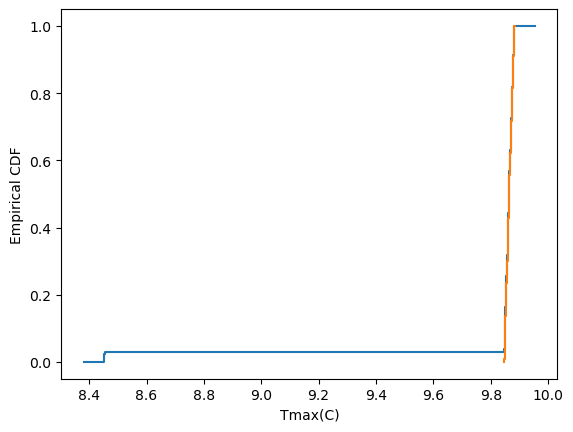

In [11]:
# #based on the example n the documentation
# res = stats.ecdf(oct_hist)
# res2 = stats.ecdf(oct_proj)

# print(res.cdf.quantiles)
# ax = plt.subplot()

# res.cdf.plot(ax,label="Historical 1990-2019")
# res2.cdf.plot(ax,label="Projected 2020-2049")

# ax.set_xlabel('Tmax(C)')

# ax.set_ylabel('Empirical CDF')

# plt.legend()
# plt.show()

In [11]:
#Dino's function for the exceedance plots 
# def single_exceed_alternative(series):
#     """
#     Compute exceedance probabilities for a given Pandas Series.
#     Returns a DataFrame with:
#       - index = exceedance probability (0..1)
#       - one column with the sorted (descending) data
#     """
#     s_clean = series.dropna()
#     s_sorted = s_clean.sort_values(ascending=False)
#     n = len(s_sorted)
#     ranks = np.arange(1, n + 1)
#     exceed_probs = ranks / (n + 1.0)
#     out_df = pd.DataFrame(data=s_sorted.values, index=exceed_probs, columns=[series.name])
#     return out_df

In [13]:
ehist=single_exceed_alternative(oct_hist)
eproj=single_exceed_alternative(oct_proj)

ehist

,tmax_celsius
0.001042,9.882172
0.002083,9.882172
0.003125,9.882172
0.004167,9.882172
0.005208,9.882172
...,...
0.994792,8.453247
0.995833,8.453247
0.996875,8.453247
0.997917,8.453247


In [ ]:
fig, ax = plt.subplots(1,figsize=(10,8))
ax.ecdf(quantiles_hist,label="Historical pos",orientation='horizontal')
ax.ecdf(ehist,label="Historical exceedance",orientation='horizontal')

In [1]:
#generate some random data to test this function

In [15]:
l=10
test=np.random.rand(l,12) #100 rows by 12 columns
print(test)

[[0.23058025 0.47051554 0.56910352 0.26154815 0.63216838 0.30332907
  0.26918365 0.18491262 0.40758591 0.89032417 0.75179762 0.50740348]
 [0.2213329  0.56039905 0.88881125 0.44001557 0.24356597 0.88599301
  0.29912435 0.62767062 0.74289523 0.32162868 0.88653083 0.55556219]
 [0.29076903 0.94091552 0.5292525  0.48069867 0.27850695 0.82915675
  0.7014868  0.02139874 0.73752051 0.76893707 0.39509575 0.32741614]
 [0.76000797 0.8310706  0.22233865 0.42543758 0.50504656 0.48712995
  0.82157771 0.56932953 0.63264897 0.97565371 0.43581332 0.69891009]
 [0.11790092 0.94829286 0.0631     0.42655637 0.95783814 0.64346703
  0.70323338 0.06948624 0.78847856 0.21084324 0.74676311 0.37379071]
 [0.62078074 0.8539976  0.96757067 0.15000177 0.53307607 0.77289135
  0.73485075 0.62843714 0.34565634 0.28941244 0.41999809 0.31284506]
 [0.77471358 0.07597289 0.74810161 0.60491032 0.97650683 0.98013182
  0.26979452 0.8688857  0.83690758 0.17028884 0.41490604 0.32397836]
 [0.26988186 0.14968527 0.89359677 0.8288

In [7]:
for m in np.arange(0,12):
    print(m)

0
1
2
3
4
5
6
7
8
9
10
11


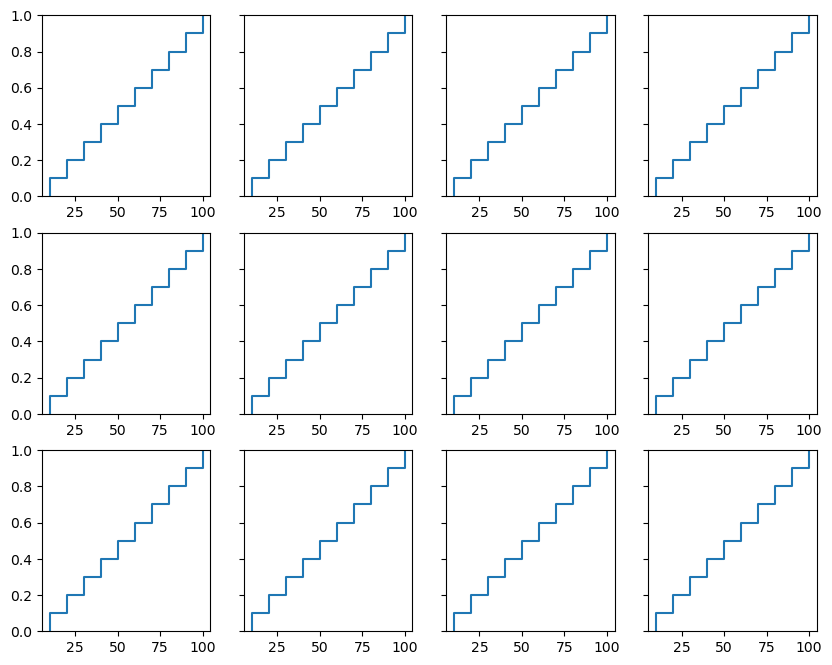

In [16]:
#iterate through the array, get the percentile of each entry for each month
quantiles=np.zeros_like(test)
fig, ax = plt.subplots(3,4,figsize=(10,8), sharey=True)
for m in np.arange(0,12):
    quantiles=percentileofscore([test[k,m] for k in np.arange(0,l)],test[:,m])
    r = m//4
    c= m%4
    ax[r,c].ecdf(quantiles,label="m="+str(m))